# Project - Classification with Hidden Features

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- You are hired by a company
- They classfied a dataset
- The features are hidden (you do not know what they are)
- They ask you to create a model to predict classes
- How accurate can you predict the classes
- Are some features more important than others

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

### Step 1.b: Read the data
- Use ```pd.read_csv()``` to read the file `files/classified_data.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [7]:
data = pd.read_csv('files/classified_data.csv', index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Step 1.c: Inspect the data
- How big it the dataset?
    - HINT: Use `len(.)`
- How many classes are there?
    - HINT: Use `.value_counts()` on the column containing the classes

In [4]:
len(data)

1000

In [10]:
data['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.info()```

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```

In [12]:
data.isnull().any()

WTT             False
PTI             False
EQW             False
SBI             False
LQE             False
QWG             False
FDJ             False
PJF             False
HQE             False
NXJ             False
TARGET CLASS    False
dtype: bool

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Dependent and independent features
- Assign independent features (those predicting) to `X`
- Assign classes (labels/dependent features) to `y`

In [13]:
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']

### Step 3.b: Divide into training and test set
- Divide into training and test set
    - HINT: `train_test_split`

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Step 3.c: Train, fit, score a SVC model
- Create the model
```Python
svc = SVC()
```
- Fit the model
```Python
svc.fit(X_train, y_train)
```
- Predict with the model
```Python
y_pred = svc.predict(X_test)
```
- Test the accuracy
```Python
accuracy_score(y_test, y_pred)
```

In [15]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.955

### Step 3.d: Find most important features
- To find the most important features use [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)

```Python
perm_importance = permutation_importance(svc, X_test, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [16]:
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances_mean

array([0.033, 0.022, 0.083, 0.   , 0.003, 0.014, 0.005, 0.046, 0.093,
       0.   ])

### Step 3.e: Visualize the results
- To visualize the result we want the most important features sorted
- This can be `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- Then to visualize it we will create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

<AxesSubplot:>

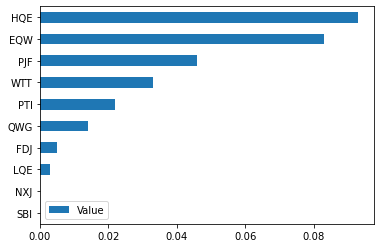

In [17]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

### Step 3.f: Train, fit, score a KNeighborsClassifier
- Do the same as above for `KNeighborsClassifier`

In [18]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

0.955

In [19]:
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances_mean

array([0.042, 0.019, 0.087, 0.   , 0.008, 0.012, 0.005, 0.051, 0.093,
       0.002])

<AxesSubplot:>

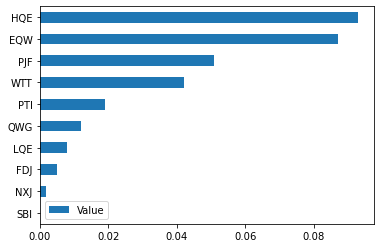

In [20]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

### Step 3.g: Conclusion
-  Are the models using the same features?

In [21]:
# HQE EQW PJF are most important features

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: What are the findings?
- Write down your findings

### Step 4.b: How to present the findings?
- We need to present the findings?

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: How to follow up?
- This is potentially a long-term relationship with a company
- How can we follow up and improve on the model after more data is available?